In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

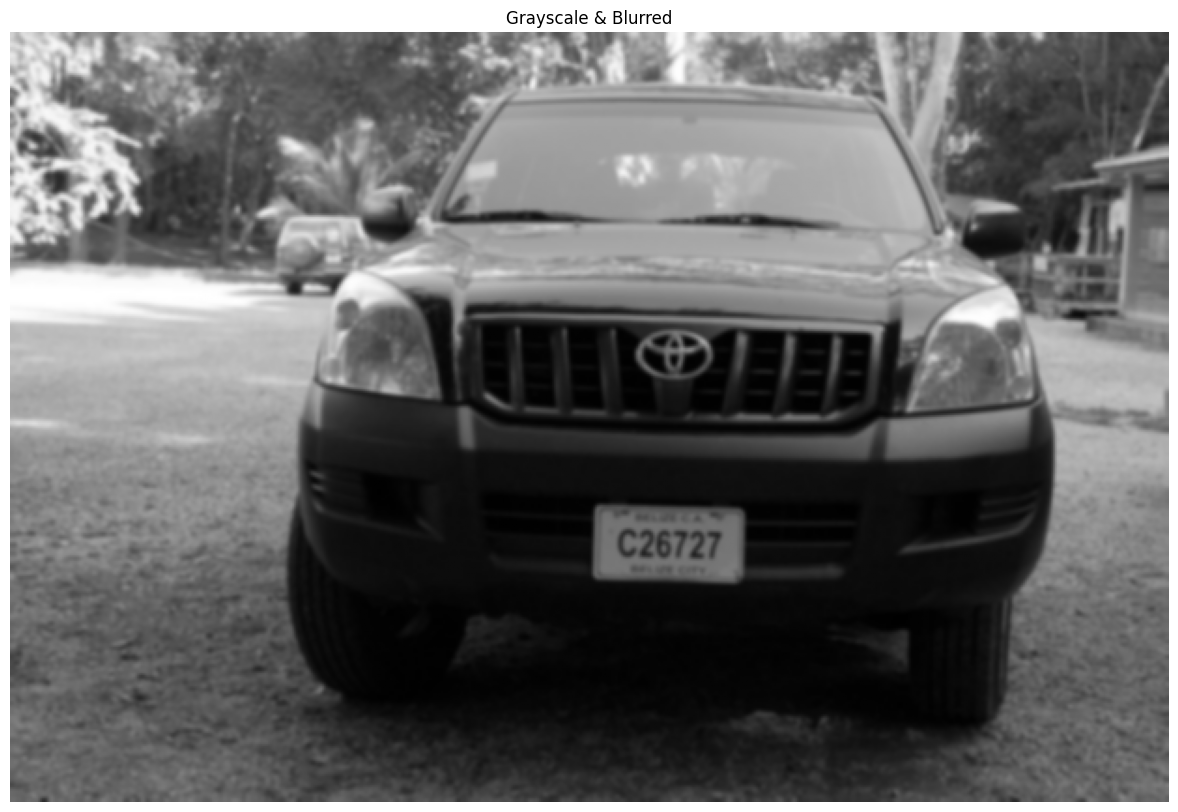

In [2]:
img=cv2.imread("C:\\Users\\Shreya Naik\\Downloads\\test\\ccc1a2d44a290368.jpg")
scale=620/img.shape[1]#divides width by 620
dim=(620, int(img.shape[0]*scale))#new dimensions are resized to 620x height*scaling factor
img_resized=cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
gray=cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)#grayscaling
img_blur=cv2.GaussianBlur(gray, (5, 5), 0)#kernel size is 5x5 which reduces noise and helpful in edge detection
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
plt.title('Grayscale & Blurred')
plt.imshow(img_blur, cmap='gray')
plt.axis('off')
plt.show()

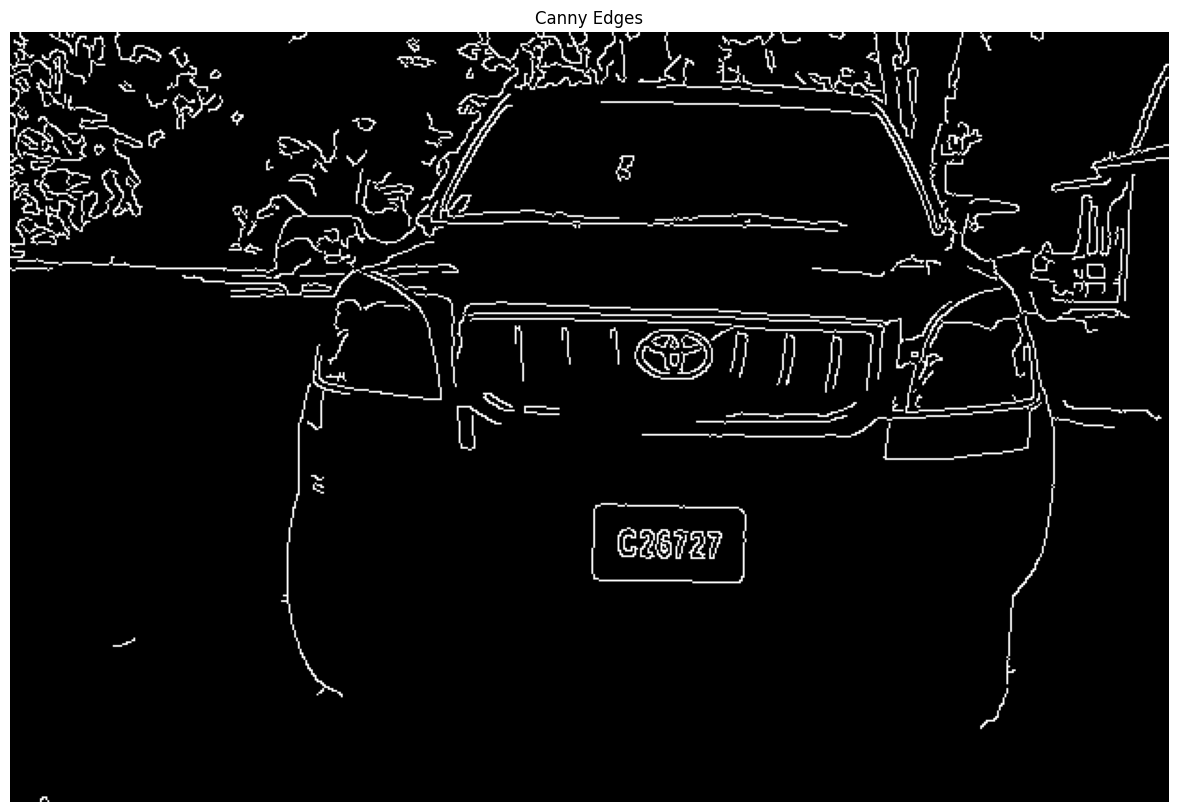

In [3]:
canny = cv2.Canny(img_blur, 100, 200)#thresholds defined to identify edges
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
plt.title('Canny Edges')
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()

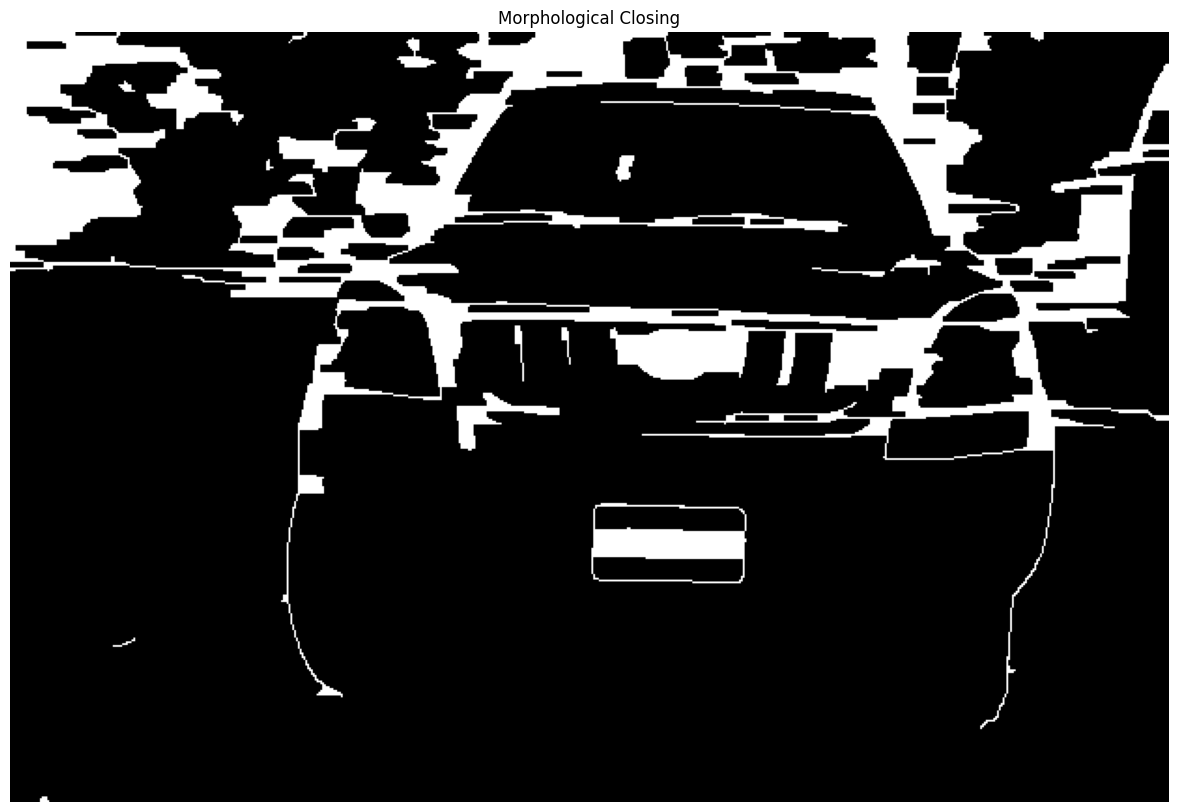

In [4]:
k=cv2.getStructuringElement(cv2.MORPH_RECT, (17, 3))#17x3 kernel size defined to identify white pixels
closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, k)
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
plt.title('Morphological Closing')
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.show()

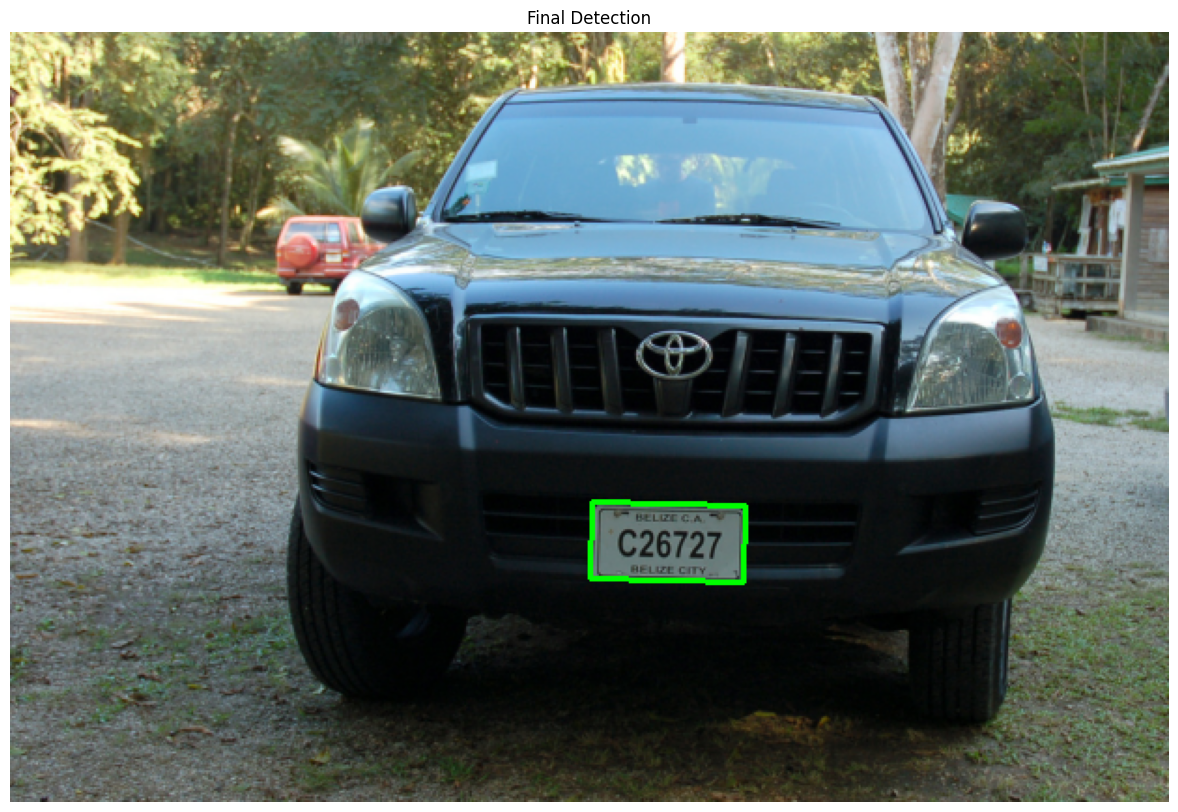

In [5]:
contours, _ =cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#finds outline of white pixels
lic_plate=[]
img_bounding_box=img_resized.copy()
scores=[]
for i in contours:
    min_rect=cv2.minAreaRect(i)#smallest rectangle around each contour
    (x, y), (width, height), angle=min_rect
    if width<height:
        width,height=height,width
        angle=(angle + 90) % 180
    aspect_ratio=width/height if height>0 else 0
    area=cv2.contourArea(i)#calculates white pixels in each contour
    if (aspect_ratio>1.5 and aspect_ratio<5.5) and (area>1000 and area<40000):#ranges of values to dtect license plate
        x_br, y_br, w_br, h_br = cv2.boundingRect(i)
        canny_crop=canny[y_br:y_br+h_br, x_br:x_br+w_br]#crops canny image
        if canny_crop.size>0:
            edge_density = np.sum(canny_crop > 0)/canny_crop.size#no of edge pixels/total number of pixels
            scores.append((edge_density, i, min_rect))
if scores:
    scores.sort(key=lambda s: s[0], reverse=True)#highest edge denisty in the tuple sorted at 0th index
    best_score, best_contour, best_rect=scores[0]
    box=cv2.boxPoints(best_rect)
    box=np.intp(box)
    cv2.drawContours(img_bounding_box, [box], 0, (0, 255, 0), 2)
    lic_plate.append(box)
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
plt.title(f'Final Detection')
plt.imshow(cv2.cvtColor(img_bounding_box, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

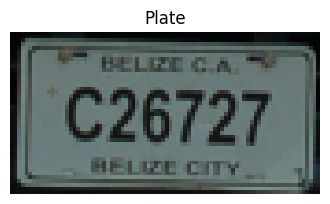

In [6]:
if lic_plate:
    extr_plate=lic_plate[0]
    x, y, w, h=cv2.boundingRect(extr_plate)
    cropped_plate=img_resized[y:y+h, x:x+w]
    plt.figure(figsize=(4, 3))
    plt.title("Plate")
    plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()